## 202211014  Nikunj Rathod -- Lab-3

# Iris Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )

In [ ]:
species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


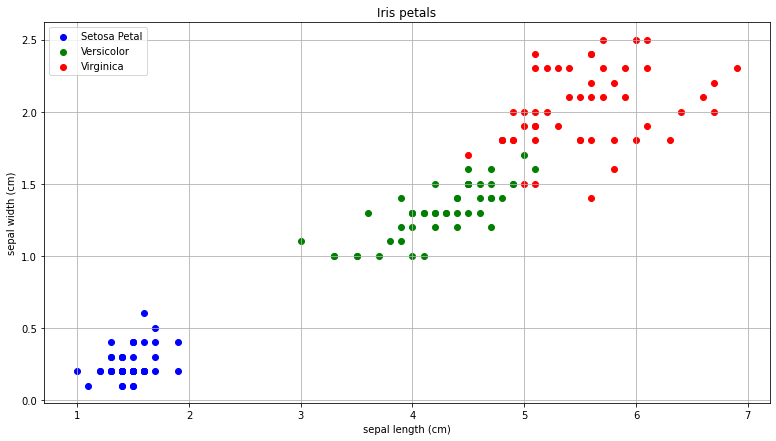

In [ ]:
setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species=='versicolor']
virginica = iris[iris.species=='virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa Petal", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")

ax.set_xlabel("sepal length (cm)")
ax.set_ylabel("sepal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

In [ ]:
from sklearn.model_selection import train_test_split

X = iris.drop(['sepal length (cm)', 'sepal width (cm)', 'target', 'species'], axis=1)
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2529)

In [ ]:
X.columns

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

In [ ]:
X.shape,y.shape

((150, 2), (150,))

In [ ]:
from sklearn.svm import SVC
scv = SVC()
scv.fit(X_train,y_train)
y_pred = scv.predict(X_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy :",accuracy_score(y_pred,y_test)),print("Precision :",precision_score(y_pred,y_test,average='macro')),print("Recall :",recall_score(y_pred,y_test,average='macro')),
print("f1_score :",f1_score(y_pred,y_test,average='macro'))

Accuracy : 0.9777777777777777
Precision : 0.9848484848484849
Recall : 0.9666666666666667
f1_score : 0.9747042023663811


In [ ]:
# from sklearn.svm import LinearSVC
svc = LinearSVC(max_iter=1000)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy :",accuracy_score(y_pred,y_test)),print("Precision :",precision_score(y_pred,y_test,average='macro')),print("Recall :",recall_score(y_pred,y_test,average='macro')),
print("f1_score :",f1_score(y_pred,y_test,average='macro'))

Accuracy : 0.8666666666666667
Precision : 0.9090909090909092
Recall : 0.8666666666666667
f1_score : 0.8640350877192983


In [ ]:
# from sklearn.svm import SVC
svcr = SVC(kernel='sigmoid')
svcr.fit(X_train,y_train)
y_pred = svcr.predict(X_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy :",accuracy_score(y_pred,y_test,normalize=True)),print("Precision :",precision_score(y_pred,y_test,average='weighted')),print("Recall :",recall_score(y_pred,y_test,average='macro',zero_division=0)),
print("f1_score :",f1_score(y_pred,y_test,average='weighted'))

Accuracy : 0.3333333333333333
Precision : 0.980246913580247
Recall : 0.4393939393939394
f1_score : 0.4764750957854406


In [ ]:
# from sklearn.svm import SVC
svcp = SVC(kernel='poly')
svcp.fit(X_train,y_train)
y_pred = svcp.predict(X_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy :",accuracy_score(y_pred,y_test)),print("Precision :",precision_score(y_pred,y_test,average='macro')),print("Recall :",recall_score(y_pred,y_test,average='macro')),
print("f1_score :",f1_score(y_pred,y_test,average='macro'))

Accuracy : 1.0
Precision : 1.0
Recall : 1.0
f1_score : 1.0


In [ ]:
from sklearn.model_selection import GridSearchCV

## We can use gridsearch to fing the best parameters

In [ ]:
params = {'penalty':['l1', 'l2'],'loss':['hinge','squred_hinge'],'multi_class':['ovr','crammer_singer']}
gridsearch = GridSearchCV(svc,params)
gridsearch.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

GridSearchCV(estimator=LinearSVC(),
             param_grid={'loss': ['hinge', 'squred_hinge'],
                         'multi_class': ['ovr', 'crammer_singer'],
                         'penalty': ['l1', 'l2']})

In [ ]:
gridsearch.best_params_

{'loss': 'hinge', 'multi_class': 'crammer_singer', 'penalty': 'l1'}

## Here we got our best params according to the rbf SVC so we now using it to predict the testset

In [ ]:
y_pred_gd = gridsearch.predict(X_test)

In [ ]:
print("Accuracy :",accuracy_score(y_pred,y_test)),print("Precision :",precision_score(y_pred,y_test,average='macro')),print("Recall :",recall_score(y_pred,y_test,average='macro')),
print("f1_score :",f1_score(y_pred,y_test,average='macro'))

Accuracy : 1.0
Precision : 1.0
Recall : 1.0
f1_score : 1.0


In [ ]:
h=0.2
x_min, x_max = X['petal length (cm)'].min() - 1, X['petal length (cm)'].max() + 1
y_min, y_max = X['petal width (cm)'].min() - 1, X['petal width (cm)'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


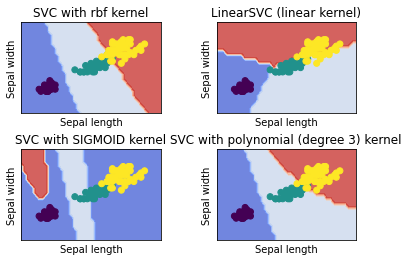

In [ ]:
titles = ['SVC with rbf kernel',
          'LinearSVC (linear kernel)',
          'SVC with SIGMOID kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((scv, svc, svcr, svcp)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=y)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

### Here, We can see that the RBF and Polynomial kernel gives us the best boundaries over the iris data target set

# skimage Dataset

Load the following images from skimage

In [ ]:
from skimage import data
from skimage.color import rgb2gray
from ipywidgets import interact,interactive,interact_manual
from skimage.viewer import ImageViewer

<ipython-input-5-b4801329be61>:4: UserWarning: Viewer requires Qt
  from skimage.viewer import ImageViewer


In [ ]:
from skimage import img_as_ubyte,img_as_float
gray_images = {
    "cat":rgb2gray(img_as_float(data.chelsea())),
    "astro":rgb2gray(img_as_float(data.astronaut())),
    "camera":data.camera(),
    "coin":data.coins(),
    "clock":data.clock(),
    "blobs":data.binary_blobs(),
    "coffee":rgb2gray(img_as_float(data.coffee()))
}

### Plot any one of these images using matplotlib and extract the data matrix for this image.

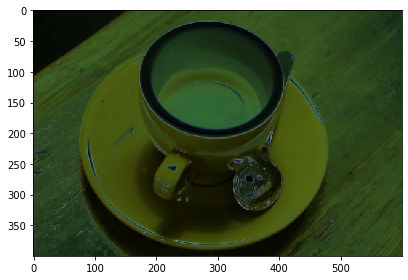

In [ ]:
from skimage import data, io, filters

image = data.coffee()
edges = filters.sobel(image)
io.imshow(edges)
io.show()

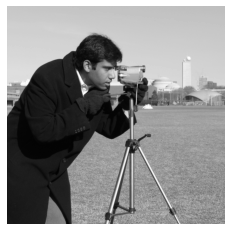

In [ ]:
camera = data.camera()

# Display the image using Matplotlib
plt.imshow(camera, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
camera = data.camera()

# Extract the data matrix
data_matrix = camera.astype(float)

# Print the shape and data type of the matrix
print("Data matrix shape:", data_matrix.shape)
print("Data matrix data type:", data_matrix.dtype)

Data matrix shape: (512, 512)
Data matrix data type: float64


In [ ]:
data_matrix

array([[200., 200., 200., ..., 189., 190., 190.],
       [200., 199., 199., ..., 190., 190., 190.],
       [199., 199., 199., ..., 190., 190., 190.],
       ...,
       [ 25.,  25.,  27., ..., 139., 122., 147.],
       [ 25.,  25.,  26., ..., 158., 141., 168.],
       [ 25.,  25.,  27., ..., 151., 152., 149.]])

### Compute the SVD of the matrix, and compute a rank-k approximation of the image, where k is user-defined. This will be the reconstructed image

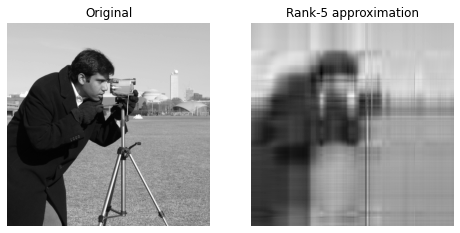

In [ ]:
U, S, V = np.linalg.svd(camera)

# Define the rank-k approximation
k = 5
Uk = U[:, :k]
Sk = np.diag(S[:k])
Vk = V[:k, :]
approximation = Uk @ Sk @ Vk

# Display the original and reconstructed images
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4))
ax0.imshow(camera, cmap='gray')
ax0.set_title('Original')
ax0.axis('off')
ax1.imshow(approximation, cmap='gray')
ax1.set_title(f'Rank-{k} approximation')
ax1.axis('off')
plt.show()

### For different values of k, plot the original image as well as the reconstructed image. How does the quality vary with k?

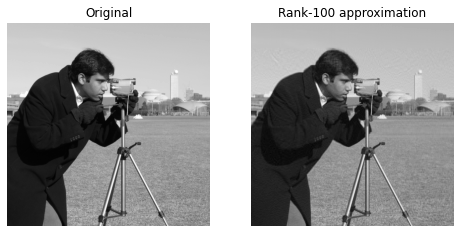

In [ ]:
U, S, V = np.linalg.svd(camera)

# Define the rank-k approximation
k = 100
Uk = U[:, :k]
Sk = np.diag(S[:k])
Vk = V[:k, :]
approximation = Uk @ Sk @ Vk

# Display the original and reconstructed images
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4))
ax0.imshow(camera, cmap='gray')
ax0.set_title('Original')
ax0.axis('off')
ax1.imshow(approximation, cmap='gray')
ax1.set_title(f'Rank-{k} approximation')
ax1.axis('off')
plt.show()

### A larger value of k will result in a more accurate approximation, but will also require more memory and computation time.

### Note that, if the original image is of size M x N, and we are computing a k rank approximation, then we need to store the M x k left singular matrix, the N x k right singular matrix as well as k singular values. What is the compression ratio with respect to the original image? Report the compression ratio for different values of k.

In [ ]:
n_original = camera.size

# Compute the compression ratio for different values of k
for k in [10, 50, 100, 200]:
    # Compute the SVD of the data matrix
    U, S, V = np.linalg.svd(camera)

    # Define the rank-k approximation
    Uk = U[:, :k]
    Sk = np.diag(S[:k])
    Vk = V[:k, :]
    approximation = Uk @ Sk @ Vk

    # Compute the number of elements in the approximation matrix
    n_approx = Uk.size + Sk.size + Vk.size

    # Compute the compression ratio
    compression_ratio = n_original / n_approx

    # Print the compression ratio for the current value of k
    print(f'k = {k}: compression ratio = {compression_ratio:.2f}')

k = 10: compression ratio = 25.35
k = 50: compression ratio = 4.88
k = 100: compression ratio = 2.33
k = 200: compression ratio = 1.07


### (How do you convert an RGB image, having shape M x N x 3 into a 2D matrix, so that you can apply SVD?)

In [ ]:
from skimage import io

image = io.imread('/content/Hydrangeas.jpg')

matrix = image.reshape(-1, image.shape[-1])

U, S, V = np.linalg.svd(matrix)